In [30]:
import os
import json
import csv
import pandas as pd
from pandas.io.json import json_normalize
import time

MYNAME = 'Emma Prairie'
def import_messages():
    DF_list = list() #list of DataFrame objects
    friends = list() #list of friends
    list_of_messages = os.listdir('messages/inbox') #list of folders as strings

    for i in range(len(list_of_messages)): #iterate through each folder and append to DF_list
        try:
            file = 'messages/inbox/' + list_of_messages[i] +'/message.json'
            num = sum(1 for line in open(file)) 
            if num > 40: #check for bad files
                with open(file, 'r') as json_data:
                    dt = json.load(json_data)
                name = dt['participants']
                if(len(name) == 2 and name[0]['name'] != MYNAME):
                    friends.append(name[0]['name'])
                else:
                    friends.append('GROUP')
                DF_list.append(pd.DataFrame(json_normalize(dt, 'messages')[['timestamp_ms', 'content', 'sender_name']]))
        except:
            print(':)')
    return DF_list, friends

def best_friend(DF_list, friends): #parameter list of DataFrame objects from import_message
    num_messages = list()
    the_friend = list()

    for i in range(len(DF_list)):
        if(friends[i] == 'GROUP'):
            continue
        num_messages.append(len(DF_list[i].index))
        the_friend.append(friends[i])

    table = pd.DataFrame({'Messages' : num_messages, 'Friend' : the_friend})
    table = table.sort_values(by = 'Messages', ascending=False)
    return table

def table_function(DF_List):
    bigdata = pd.concat(DF_list, ignore_index=True)
    bigdata = bigdata.sort_values(['timestamp_ms', 'content', 'sender_name'], ascending=[True, False, False])
    bigdata['content'] = bigdata['content'].str.replace('â', '\'')
    bigdata_user = bigdata.loc[bigdata['sender_name'] == MYNAME]
    bigdata_user.set_index('timestamp_ms', inplace=True)
    bigdata_user_date = bigdata_user.loc['1514782800000':'1546405200000']
    return bigdata_user_date

def ads():
    with open('ads/ads_interests.json', 'r') as file:
        i = json.load(file)
    with open('ads/advertisers_who_uploaded_a_contact_list_with_your_information.json', 'r') as file:
        a = json.load(file)                
    interests_list = pd.DataFrame({'Topics' : i['topics']})
    advertisers_list = pd.DataFrame({'Advertisers' : a['custom_audiences']})
    return interests_list, advertisers_list

def sleepinfo(bigdata_user_date):
    sleeplist = []
    datelist = []
    five_am = 1549015200000
    count = 0

    for i in range(len(bigdata_user_date)):

        j = len(bigdata_user_date) - (i + 1)

        temp = bigdata_user_date.index[j] - bigdata_user_date.index[j - 1]
        if temp > 10800000 and temp < 46800000:
            five_am -= 86400000
            temp = temp / (1000 * 60 * 60)

            temp_0 = bigdata_user_date.index[j] / 1000
            temp_date = time.strftime('%Y-%m-%d', time.localtime(temp_0))

            count += 1
            sleeplist.append(temp)
            datelist.append(temp_date)

    sleep = pd.DataFrame(sleeplist)
    date = pd.DataFrame(datelist)

    table_0 = pd.concat([date, sleep], axis=1)
    table_0.columns = ['date', 'sleep']
    table_0.drop_duplicates('date')
    return table_0

def average_daily_messages(bigdata_user_date):
    average_messages = len(bigdata_user_date) / (397) #replace 397 with number of days you're considering in data
    return average_messages

interests_list, advertisers_list = ads() 
DF_list, friends = import_messages() #ignore
all_messages_list = table_function(DF_list)
bff_list = best_friend(DF_list, friends)
sleep_list = sleepinfo(all_messages_list)
avg_daily = average_daily_messages(all_messages_list)

#print(interests_list) #graph word cloud
#print(advertisers_list) #graph word cloud
#print(all_messages_list)
#print(bff_list) #graph donut chart
print(sleep_list) #graph sleep at night
print(avg_daily) #average texts per day 

                                       Topics
0                                     Academy
1                                    Activism
2                            Adventure travel
3                                     Alumnus
4                  Android (operating system)
5                             Applied science
6                                   Argentina
7                                        Asia
8                               Asian cuisine
9                           Assamese language
10              Association football (Soccer)
11   Association of Commonwealth Universities
12                                Automobiles
13                                  Bake sale
14                                     Baking
15                                     Ballet
16                                     Banana
17                                Bell Canada
18                           Bengali language
19                        Black History Month
20                                

     Messages              Friend
286      5070        Mukund Mauji
8        4312        Alan Goodman
263      2610     Matt Hrushevsky
261      2599  Matthew Filipovich
150      2215     Hatem Dawaghreh


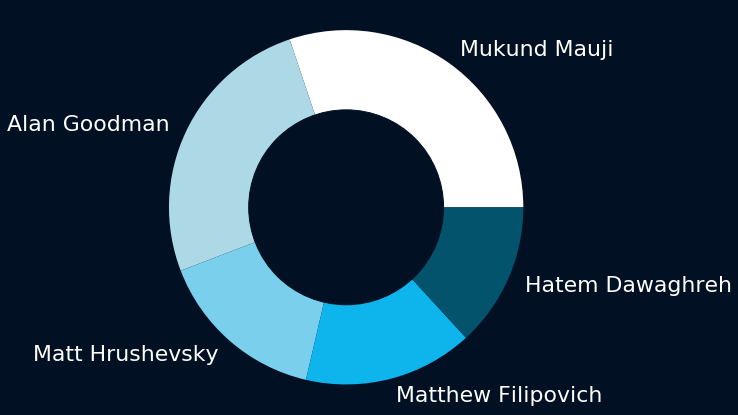

In [137]:
## The best friends donut plot 
import matplotlib.pyplot as plt

hex = '#011123'


#Data
n = bff_list[0:5]
names = n.loc[:,"Friend"]
size=n.loc[:,"Messages"]
print (n)

white = '#FFFFFF'
lightB = '#ADD8E6'
MidB = '#79cfec'
midderB = '#0eb4ec'
DB = '#04536d'



#Creating inner circle for the donut
my_circle=plt.Circle( (0,0), 0.550, color=hex)

fig = plt.figure(figsize=(7,8))
fig.patch.set_facecolor(hex)

# Plotting
plt.rcParams['text.color'] = 'white'
plt.rcParams.update({'font.size': 22})
plt.pie(size, labels=names, colors=[white,lightB,MidB,midderB,DB])
p=plt.gcf()
plt.axis("image") #making sure it stays circular
p.gca().add_artist(my_circle) #integrating the white circle with the plot
plt.show()

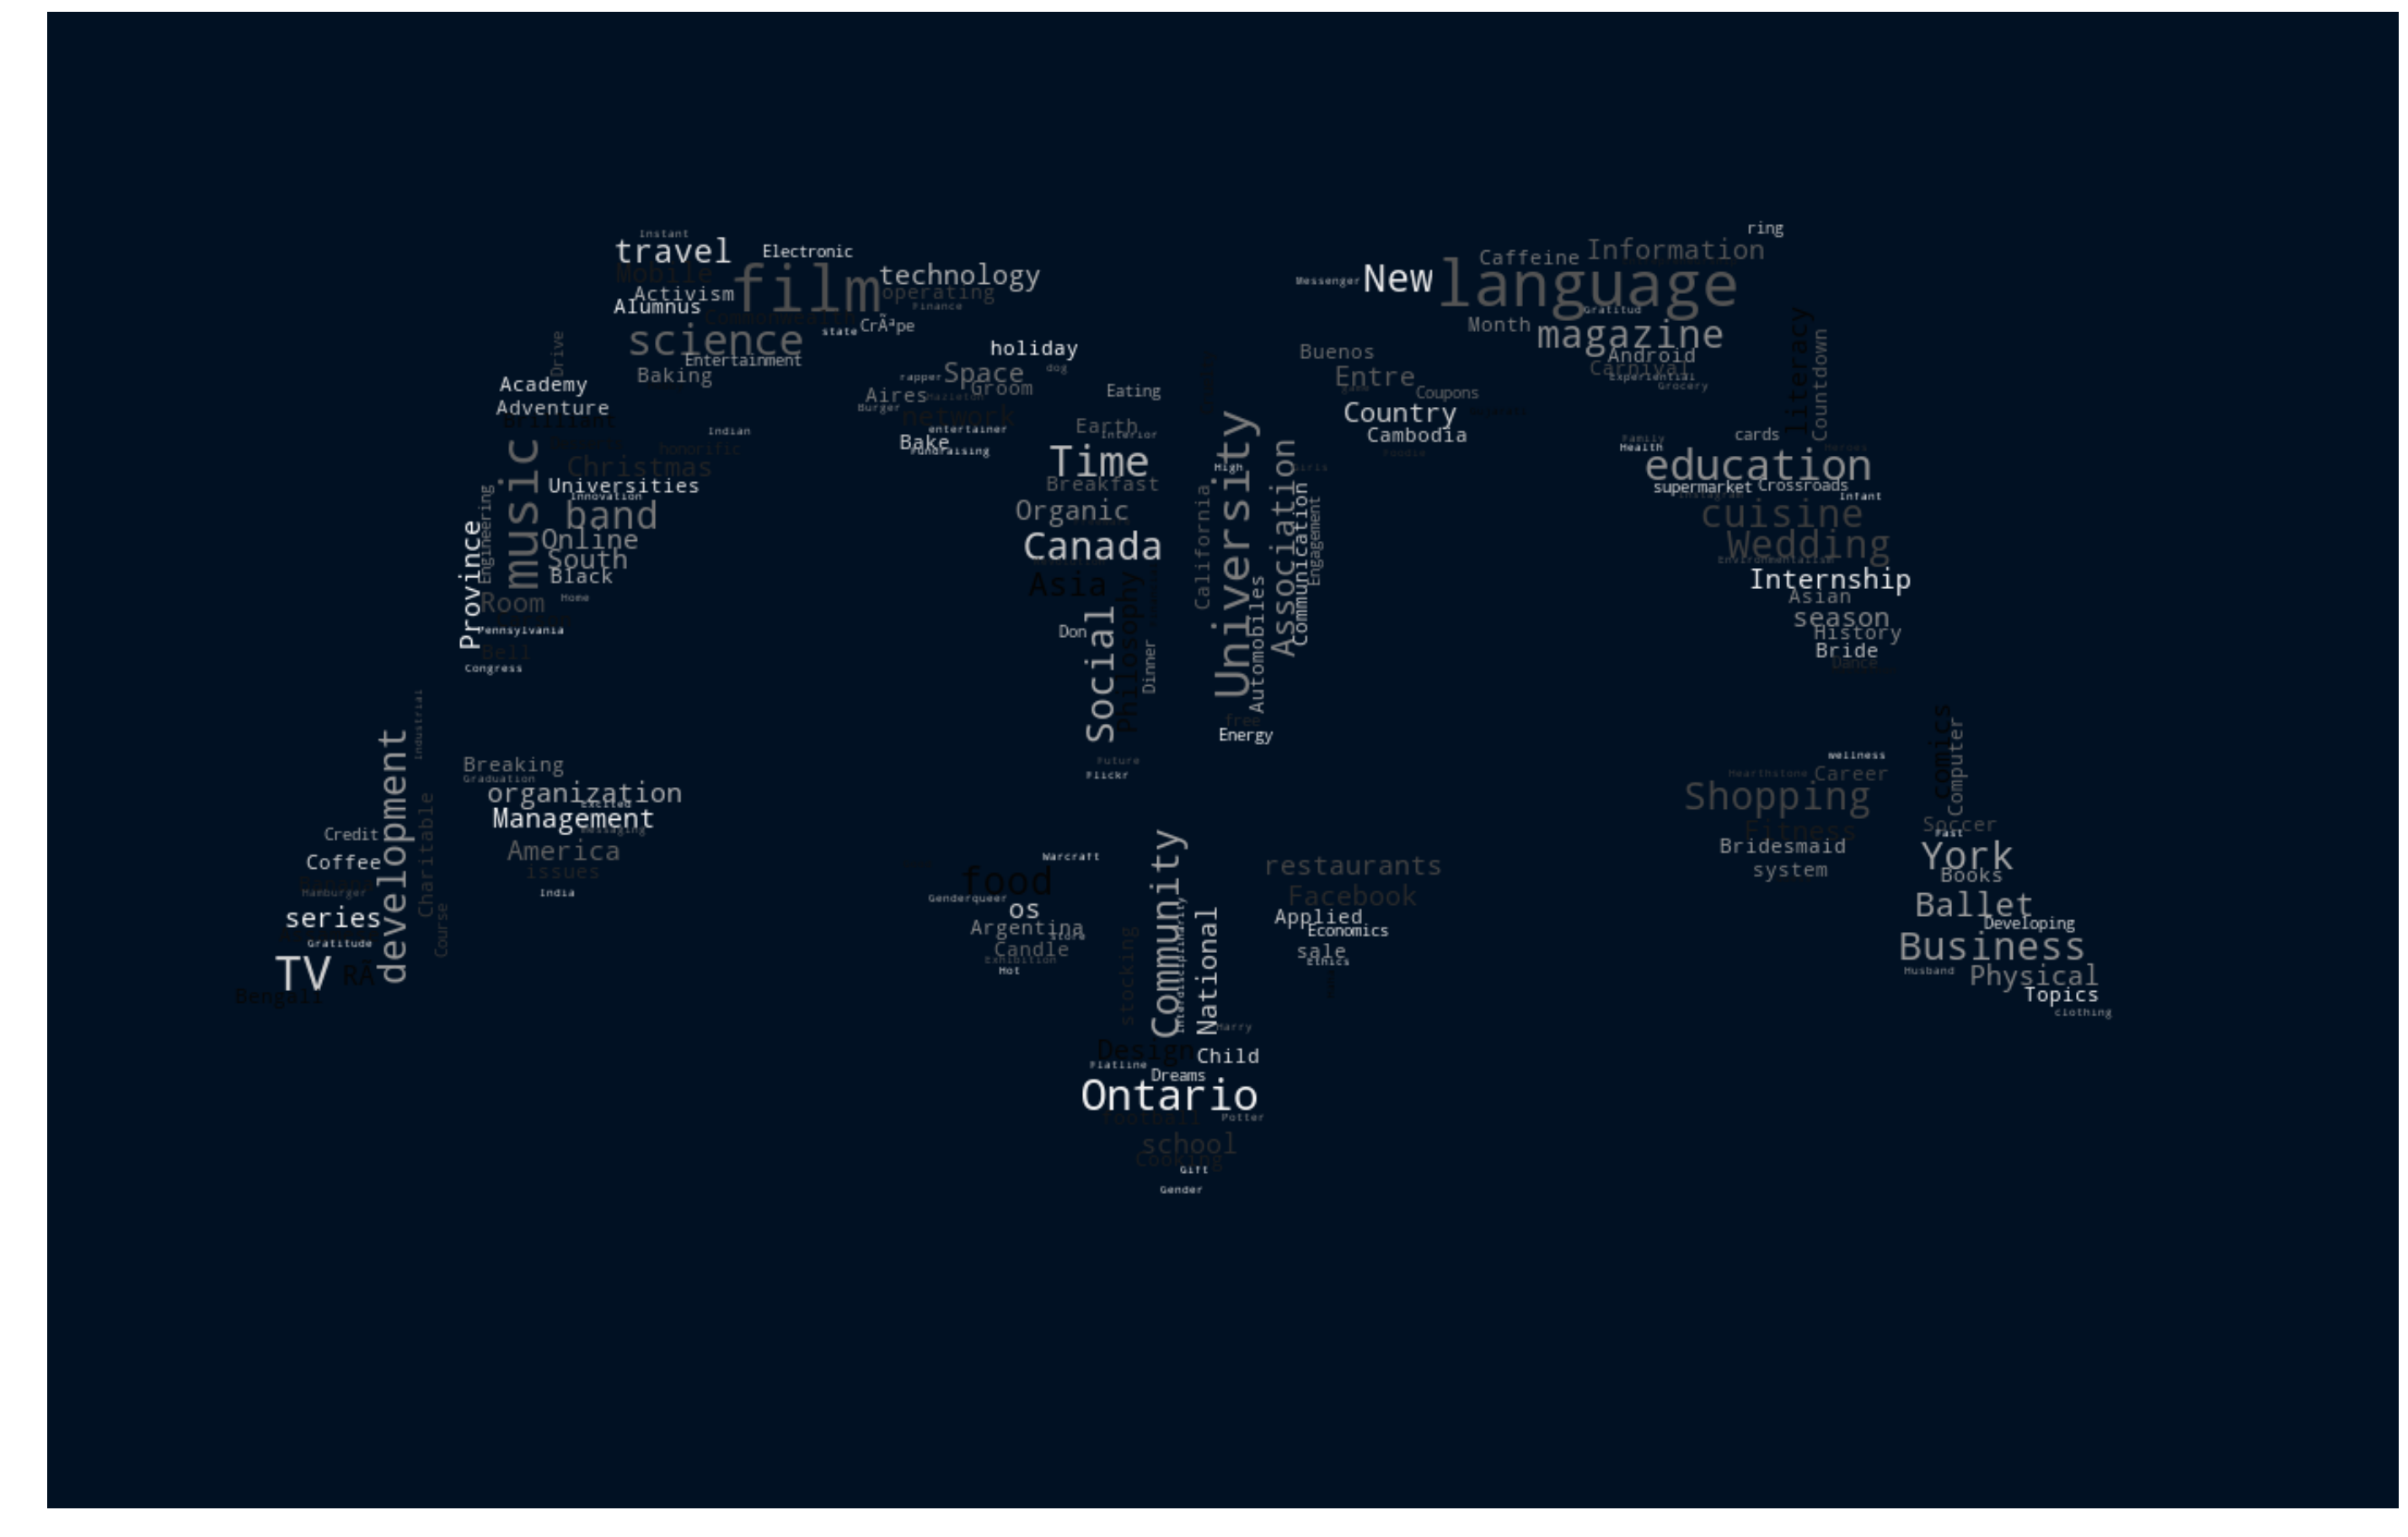

<Figure size 432x288 with 0 Axes>

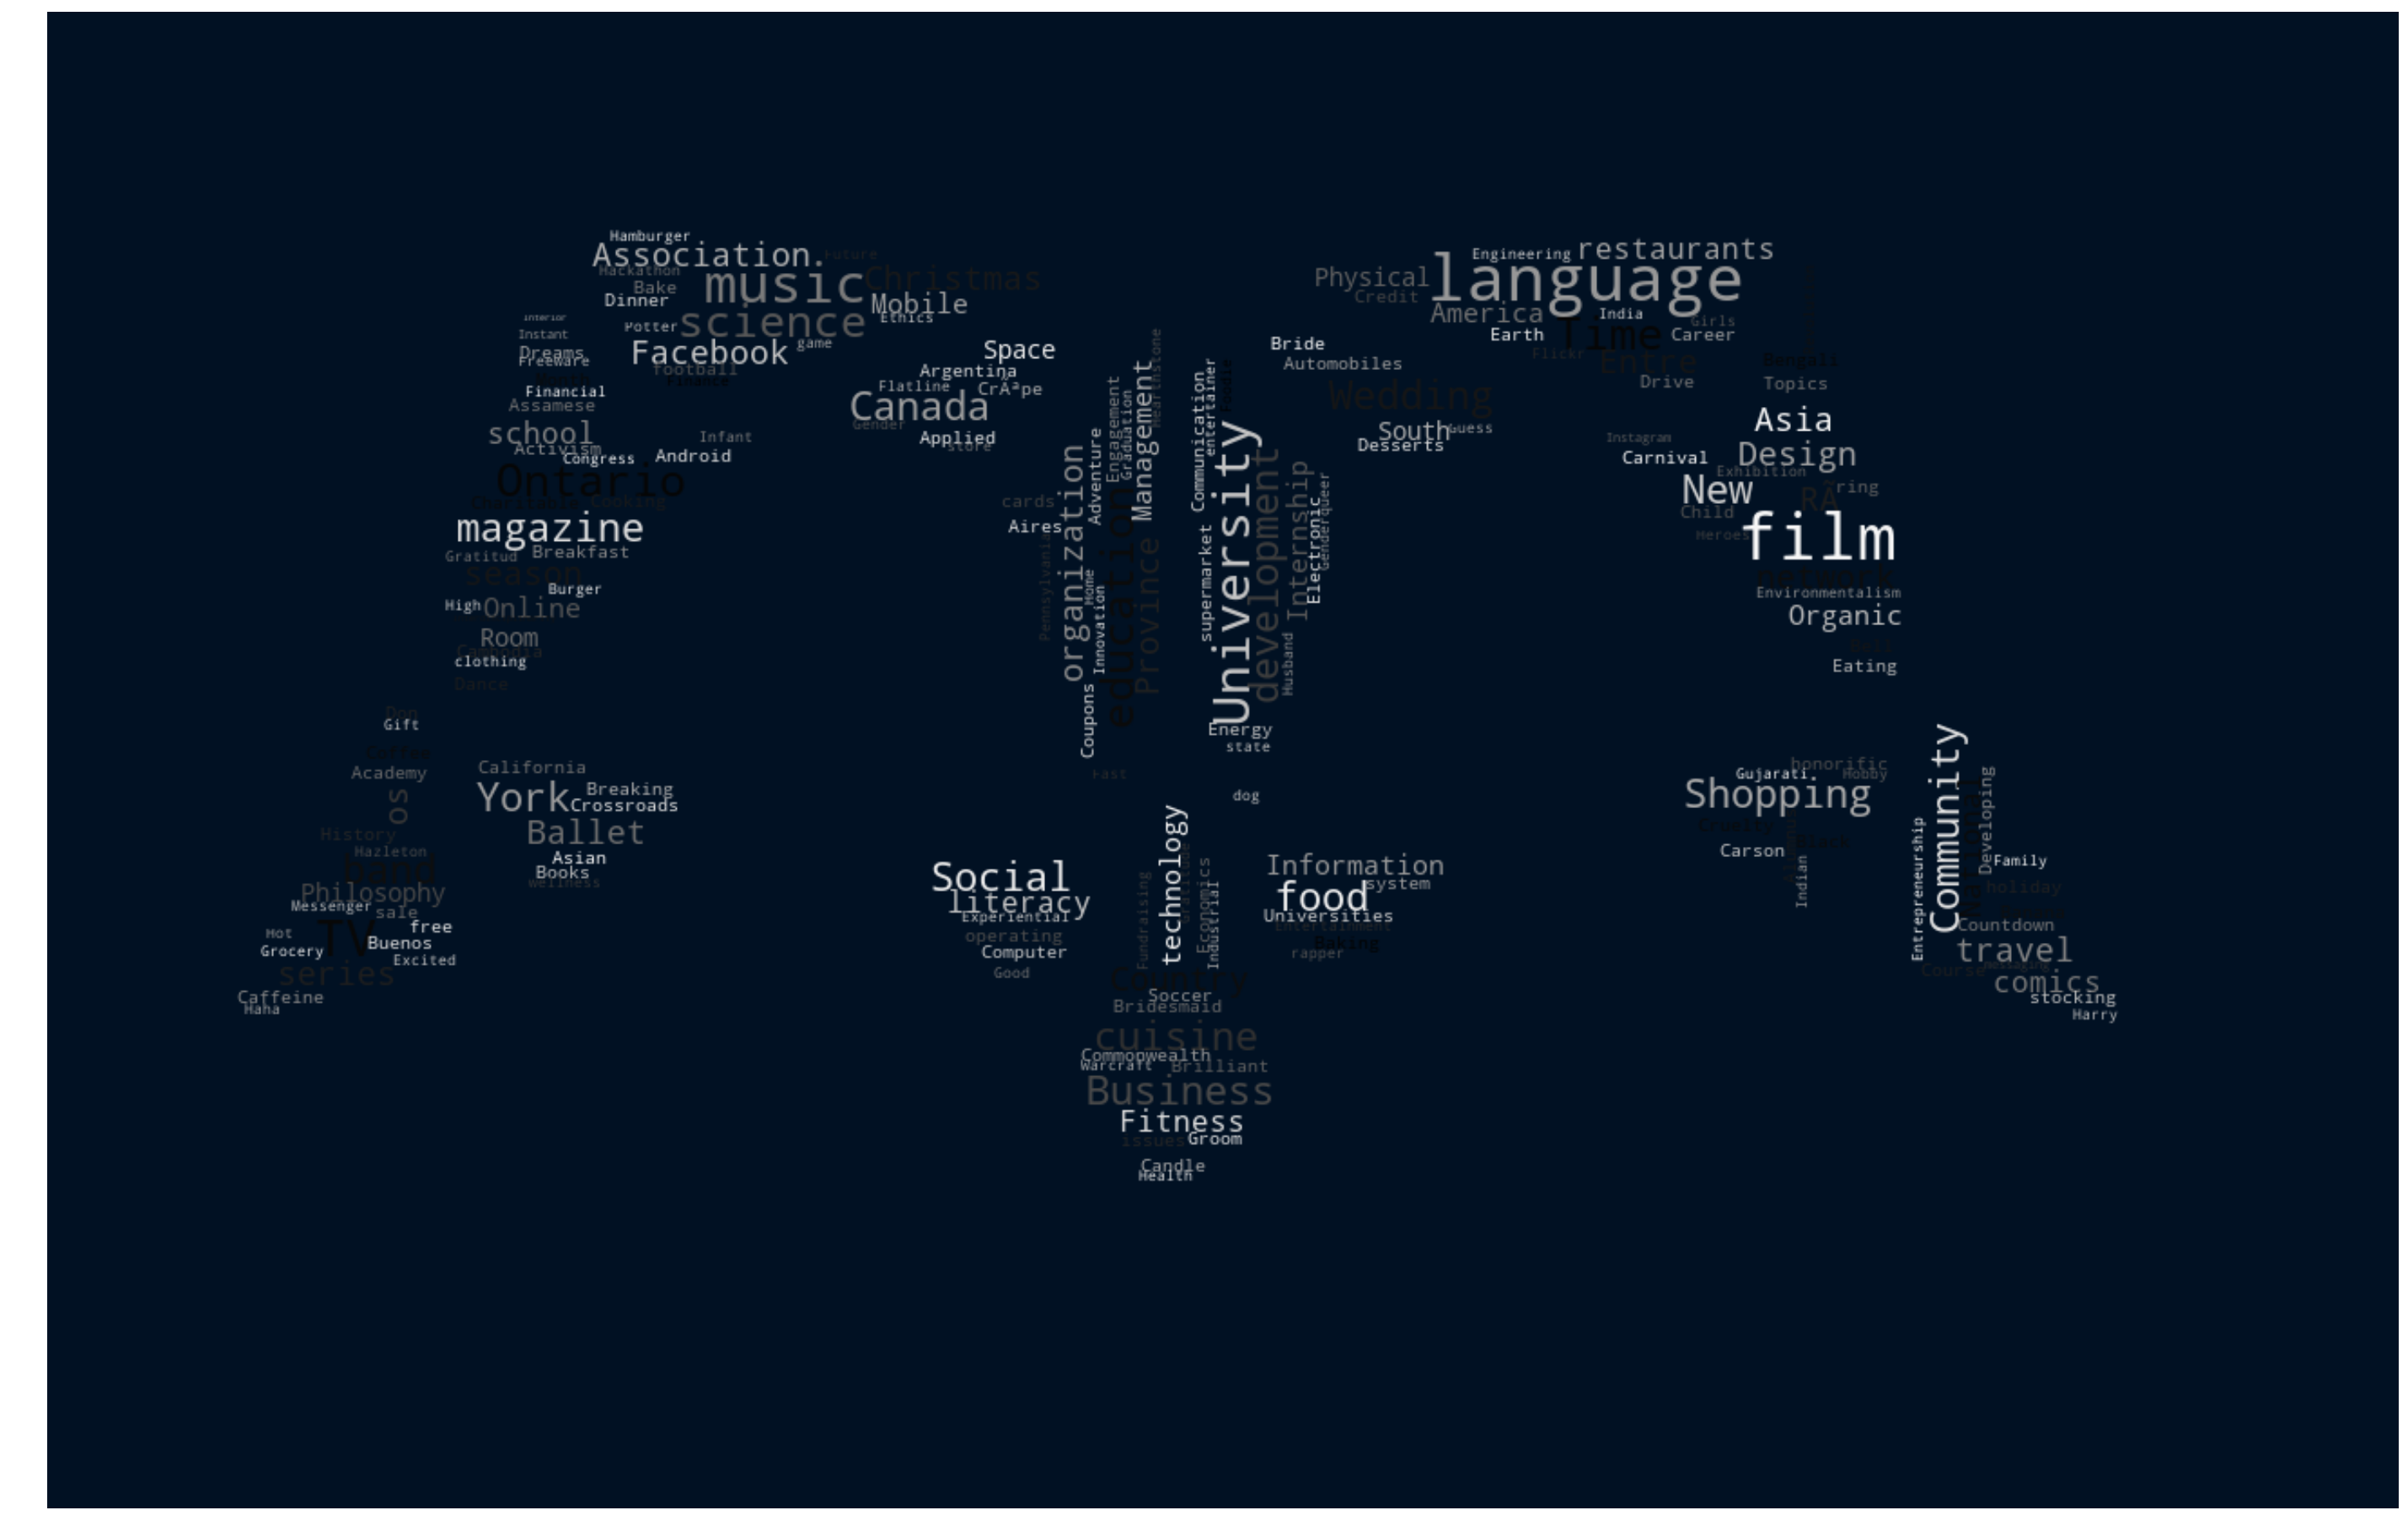

In [135]:
## The word clouds for advertisers
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import urllib
import requests

mask = np.array(Image.open("qhacksbetter.png"))
mask2 = np.array(Image.open("flip.png"))
text = interests_list
wordcloud = WordCloud(width=480, height=480, margin=0, background_color=hex, colormap="gist_gray", mask = mask).generate(text)


fig = plt.figure(figsize=(50,60))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
plt.savefig('words2.png')
text2 = advertisers_list
wordcloud2 = WordCloud(width=480, height=480, margin=0, background_color=hex, colormap="gist_gray", mask = mask).generate(text)

fig = plt.figure(figsize=(50,60))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('words.png')


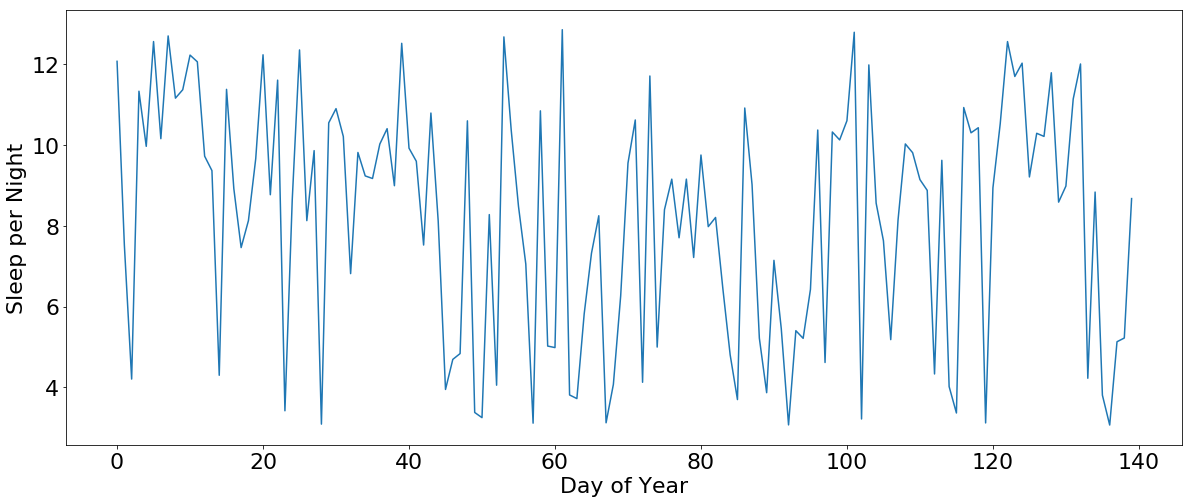

140


TypeError: 'float' object cannot be interpreted as an integer

In [112]:
sleep_list.drop_duplicates(subset = 'date',keep = False, inplace = True )

sleep = np.array(sleep_list.loc[:, 'sleep'])
date = sleep_list.loc[:, 'date']
date = np.array(date)


fig = plt.figure(figsize=(20,8))
plt.plot(range(len(sleep)),sleep)
plt.xlabel('Day of Year')
plt.ylabel('Sleep per Night')

plt.show()
n = len(sleep)
print(n)



for i in range(0, n/7):

    np.split(sleep(n-6-6*i, n-6*i))
    i=i+1
    